In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

In [14]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

In [15]:
data = pd.read_csv('Dataset_feuilles_1.csv')
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,...,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,...,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,...,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,...,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,...,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,...,0.007812,0.000000,0.000000,0.008789,0.017578,0.021484,0.061523,0.026367,0.132810,0.000000,0.000000,0.000000,0.0,0.000000,0.001953,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [20]:
data.shape

(990, 194)

In [22]:
data_test = pd.read_csv('test.csv')
data_test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,...,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,...,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,...,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,...,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,...,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,...,0.019531,0.000000,0.009766,0.009766,0.000000,0.021484,0.002930,0.028320,0.000000,0.017578,0.054688,0.073242,0.010742,0.014648,0.040039,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [17]:
data.isna().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
margin6      0
margin7      0
margin8      0
margin9      0
margin10     0
margin11     0
margin12     0
margin13     0
margin14     0
margin15     0
margin16     0
margin17     0
margin18     0
margin19     0
margin20     0
margin21     0
margin22     0
margin23     0
margin24     0
margin25     0
margin26     0
margin27     0
margin28     0
margin29     0
margin30     0
margin31     0
margin32     0
margin33     0
margin34     0
margin35     0
margin36     0
margin37     0
margin38     0
margin39     0
margin40     0
margin41     0
margin42     0
margin43     0
margin44     0
margin45     0
margin46     0
margin47     0
margin48     0
margin49     0
margin50     0
margin51     0
margin52     0
margin53     0
margin54     0
margin55     0
margin56     0
margin57     0
margin58     0
margin59     0
margin60     0
margin61     0
margin62     0
margin63     0
margin64     0
shape1    

In [19]:
data['species'].value_counts()

Acer_Opalus                     10
Crataegus_Monogyna              10
Acer_Mono                       10
Magnolia_Heptapeta              10
Acer_Capillipes                 10
Populus_Nigra                   10
Alnus_Cordata                   10
Tilia_Platyphyllos              10
Eucalyptus_Neglecta             10
Quercus_Chrysolepis             10
Quercus_Cerris                  10
Quercus_Coccinea                10
Acer_Circinatum                 10
Ilex_Aquifolium                 10
Viburnum_x_Rhytidophylloides    10
Lithocarpus_Cleistocarpus       10
Acer_Rufinerve                  10
Acer_Pictum                     10
Quercus_Agrifolia               10
Alnus_Maximowiczii              10
Quercus_Palustris               10
Quercus_Phellos                 10
Liquidambar_Styraciflua         10
Cornus_Macrophylla              10
Quercus_x_Turneri               10
Quercus_Texana                  10
Quercus_Castaneifolia           10
Quercus_Infectoria_sub          10
Salix_Intergra      

In [59]:
# features et target
y_ = data['species']
X = data.drop(columns=['id', 'species'])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# base line
baseline = KNeighborsClassifier()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

0.8535353535353535

## Amélioration

In [108]:
# features et target
y_ = data['species']
X = data.drop(columns=['id', 'species'])

In [109]:
# encodage
X = StandardScaler().fit_transform(X)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
models = {'LinearSVC' : LinearSVC(max_iter=5000),
         'KNeighborsClassifier' : KNeighborsClassifier()}

In [112]:
for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model.score(X_test, y_test))
    #print(classification_report(y_test, y_pred))
    print('_'*100)

LinearSVC
0.9595959595959596
____________________________________________________________________________________________________
KNeighborsClassifier
0.9595959595959596
____________________________________________________________________________________________________


## GridSearchCv SVM

In [213]:
# features et target
y_ = data['species']
X = data.drop(columns=['id', 'species'])

In [214]:
# encodage
X = StandardScaler().fit_transform(X)

In [231]:
X = SelectKBest(f_classif, k=188).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9797979797979798

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

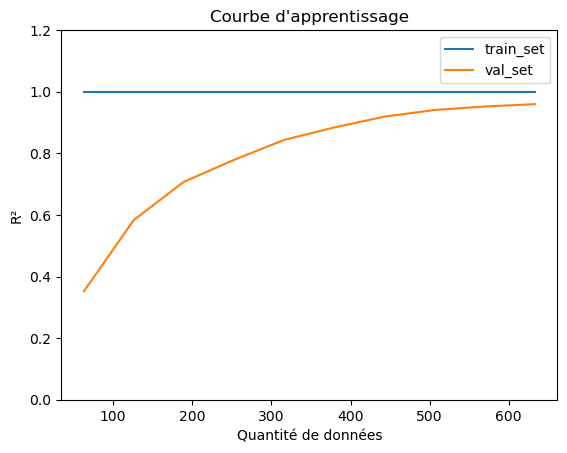

In [216]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(svc, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

In [222]:
svc = LinearSVC(max_iter=5000)

param_grid = {
    'C' : [0.1, 1, 10], 
    'dual' : [False, True], 
    'penalty' : ['l1', 'l2'], 
    'loss' : ['squared_hinge', 'hinge']
}

In [223]:
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=5000), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'dual': [False, True],
                         'loss': ['squared_hinge', 'hinge'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [232]:
best_params = grid.best_params_
best_params

{'C': 1, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1'}

In [225]:
best_score = grid.best_score_
best_score

0.9734575272669372

In [230]:
grid_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,11.825851,0.894283,0.001389,0.000497,1,False,squared_hinge,l1,"{'C': 1, 'dual': False, 'loss': 'squared_hinge...",0.981132,0.987421,0.962025,0.974684,0.962025,0.973458,0.010166,1
16,30.357039,0.701516,0.001636,0.000529,10,False,squared_hinge,l1,"{'C': 10, 'dual': False, 'loss': 'squared_hing...",0.981132,0.981132,0.962025,0.974684,0.949367,0.969668,0.012317,2
1,1.653067,0.019921,0.001990,0.000005,0.1,False,squared_hinge,l2,"{'C': 0.1, 'dual': False, 'loss': 'squared_hin...",0.974843,0.949686,0.949367,0.949367,0.949367,0.954526,0.010159,3
5,3.198580,0.107270,0.001192,0.000403,0.1,True,squared_hinge,l2,"{'C': 0.1, 'dual': True, 'loss': 'squared_hing...",0.974843,0.949686,0.949367,0.949367,0.949367,0.954526,0.010159,3
23,5.792494,0.143404,0.001194,0.000395,10,True,hinge,l2,"{'C': 10, 'dual': True, 'loss': 'hinge', 'pena...",0.981132,0.955975,0.943038,0.962025,0.930380,0.954510,0.017212,5


In [237]:
new_model = LinearSVC(**best_params, max_iter=10000)

new_model.fit(X_train, y_train)

new_model.score(X_test, y_test)

0.9848484848484849

## GridSearchCV KNN

In [277]:
# features et target
y_ = data['species']
X = data.drop(columns=['id', 'species'])

In [278]:
# encodage
X = StandardScaler().fit_transform(X)

In [260]:
scores = []

for k in range(192, 100, -1):
    X = SelectKBest(f_classif, k=k).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

In [266]:
scores[np.argmax(scores)]

0.9848484848484849

In [267]:
np.arange(192,100,-1)[np.argmax(scores)]

179

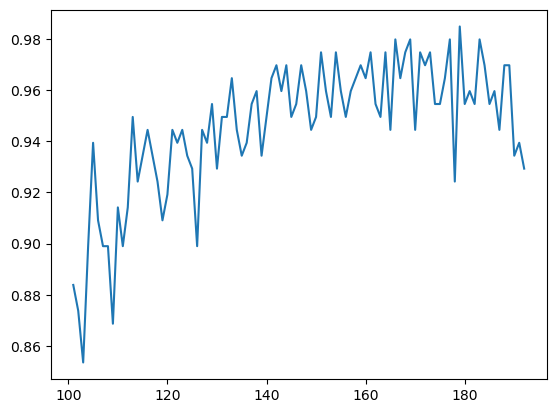

In [262]:
plt.plot(np.arange(192,100,-1), scores)

In [279]:
X = SelectKBest(f_classif, k=179).fit_transform(X, y)

In [280]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : [5, 10, 15], 
    'weights' : ['uniform', 'distance'], 
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'leaf_size' : [1, 2],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']})

In [284]:
best_params = grid.best_params_
best_params

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [286]:
best_score = grid.best_score_
best_score

0.9734734495661174

In [290]:
cv_results = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.002599,7.994176e-04,0.082153,0.013236,auto,2,manhattan,5,distance,"{'algorithm': 'auto', 'leaf_size': 2, 'metric'...",0.974843,0.981132,0.955696,0.968354,0.987342,0.973473,0.01091,1
43,0.017990,9.655217e-07,0.034981,0.000632,ball_tree,1,manhattan,5,distance,"{'algorithm': 'ball_tree', 'leaf_size': 1, 'me...",0.974843,0.981132,0.955696,0.968354,0.987342,0.973473,0.01091,1
61,0.015788,3.983921e-04,0.031982,0.000633,ball_tree,2,manhattan,5,distance,"{'algorithm': 'ball_tree', 'leaf_size': 2, 'me...",0.974843,0.981132,0.955696,0.968354,0.987342,0.973473,0.01091,1
133,0.002799,7.477293e-04,0.078956,0.007920,brute,2,manhattan,5,distance,"{'algorithm': 'brute', 'leaf_size': 2, 'metric...",0.974843,0.981132,0.955696,0.968354,0.987342,0.973473,0.01091,1
79,0.035585,1.359782e-03,0.119728,0.004441,kd_tree,1,manhattan,5,distance,"{'algorithm': 'kd_tree', 'leaf_size': 1, 'metr...",0.974843,0.981132,0.955696,0.968354,0.987342,0.973473,0.01091,1


In [291]:
new_knn = KNeighborsClassifier(**best_params)

new_knn.fit(X_train, y_train)

new_knn.score(X_test, y_test)

0.9747474747474747

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


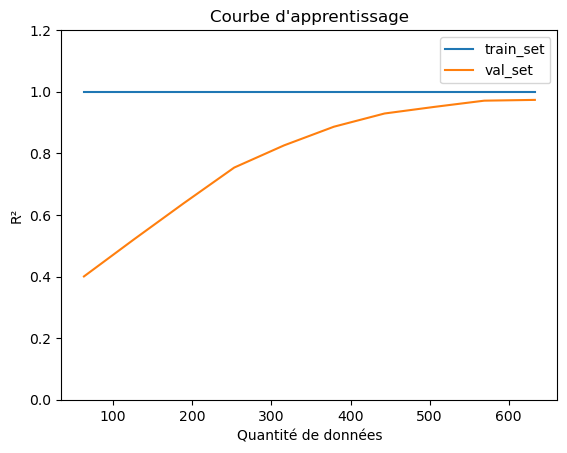

In [292]:
# courbe d'apprentissage du meilleur estimateur
N, train_score, val_score = learning_curve(new_knn, X_train, y_train, train_sizes=np.linspace(0.1, 1, 10), cv=5)

plt.title(f"Courbe d'apprentissage")
plt.plot(N, train_score.mean(axis=1), label='train_set')
plt.plot(N, val_score.mean(axis=1), label='val_set')
plt.xlabel("Quantité de données")
plt.ylabel("R²")
plt.ylim((0,1.2))
plt.legend()
plt.show()

# Conclusion

Le meilleur modèle est la SVM optimisé avec GridSearcCV, il atteint un score de plus de 98% sur le jeu de test.